In [79]:
%matplotlib inline  
%pylab inline

pylab.rcParams['figure.figsize'] = (10, 6)

import igraph
import pandas as pd
import csv
pd.set_option('display.max_rows', 500)
import itertools


Populating the interactive namespace from numpy and matplotlib


In [80]:
data = pd.read_table('/Users/mueric35/Desktop/Margolis_Center/physician-shared-patient-patterns-2014-days30.txt',header= None, sep=',')

In [87]:
data.columns = ['referer','receiver','shared_Count','Unique_Beneficiaries','Number_Same_Day_Visits']

In [88]:
data.head(3)

,referer,receiver,shared_Count,Unique_Beneficiaries,Number_Same_Day_Visits
0,1000000004,1548295421,25,11,8
1,1000000004,1790775229,60,22,30
2,1000026017,1598773715,35,15,18


In [89]:
edge = data[['referer','receiver']]

In [163]:
sort_provider = edge.groupby('referer').count().sort_values('receiver',ascending = False)
sort_provider.head()

,receiver
referer,
1700865094,98028
1538144910,84583
1063497451,65019
1932184322,49632
1346233277,48464


In [ ]:
#subgraph = data[data.provider == a.iloc[0,:].name]

In [91]:
npi = pd.read_csv('/Users/mueric35/Desktop/Margolis_Center/npi_medicarexw.csv')

In [92]:
npi.head()

,npi,seq,othpid,othpidty,othpidst,othpidiss
0,1003000142,2,H007320,8,OH,NaN
1,1003000159,1,P099265277,8,SC,NaN
2,1003000159,4,9295,8,SC,NaN
3,1003000159,5,P099269295,2,SC,NaN
4,1003000274,2,4J980BC64,8,LA,NaN


## Read Taxonomy Code

In [93]:
taxo = pd.read_csv('/Users/mueric35/Desktop/Margolis_Center/tax_csv.csv')

In [94]:
taxo.head()

,Code,Grouping,Classification,Specialization
0,163WH1000X,Nursing Service Providers,Registered Nurse,Hospice
1,207LH0002X,Allopathic & Osteopathic Physicians,Anesthesiology,Hospice and Palliative Medicine
2,207PH0002X,Allopathic & Osteopathic Physicians,Emergency Medicine,Hospice and Palliative Medicine
3,207QH0002X,Allopathic & Osteopathic Physicians,Family Medicine,Hospice and Palliative Medicine
4,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine


In [95]:
taxo = taxo.rename(columns = {'Code' :'Healthcare Provider Taxonomy Code_1'})

In [96]:
taxo.head()

,Healthcare Provider Taxonomy Code_1,Grouping,Classification,Specialization
0,163WH1000X,Nursing Service Providers,Registered Nurse,Hospice
1,207LH0002X,Allopathic & Osteopathic Physicians,Anesthesiology,Hospice and Palliative Medicine
2,207PH0002X,Allopathic & Osteopathic Physicians,Emergency Medicine,Hospice and Palliative Medicine
3,207QH0002X,Allopathic & Osteopathic Physicians,Family Medicine,Hospice and Palliative Medicine
4,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine


## Read 2005-2017 data

In [97]:
### Read Data by Generator
df = pd.read_csv('/Users/mueric35/Desktop/Margolis_Center/npidata_20050523-20170312.csv', iterator = True, chunksize=1000)
node = pd.concat([i[['NPI','Entity Type Code','Provider Business Practice Location Address State Name','Healthcare Provider Taxonomy Code_1']] for i in df])


In [98]:
node.head()

,NPI,Entity Type Code,Provider Business Practice Location Address State Name,Healthcare Provider Taxonomy Code_1
0,1679576722,1.0,NE,207X00000X
1,1588667638,1.0,FL,207RC0000X
2,1497758544,2.0,NC,251G00000X
3,1306849450,1.0,TX,2085R0202X
4,1215930367,1.0,TX,174400000X


In [99]:
node.columns = ['NPI', 'Type',
       'State',
       'Healthcare Provider Taxonomy Code_1']

In [100]:
node.head()

,NPI,Type,State,Healthcare Provider Taxonomy Code_1
0,1679576722,1.0,NE,207X00000X
1,1588667638,1.0,FL,207RC0000X
2,1497758544,2.0,NC,251G00000X
3,1306849450,1.0,TX,2085R0202X
4,1215930367,1.0,TX,174400000X


## Filter Hospice

In [101]:
node_hospice = node.loc[node['Healthcare Provider Taxonomy Code_1'].isin(taxo['Healthcare Provider Taxonomy Code_1'])]

In [102]:
node_hospice = pd.merge(node_hospice,taxo, on = 'Healthcare Provider Taxonomy Code_1',how='left')

In [103]:
node_hospice.head()

,NPI,Type,State,Healthcare Provider Taxonomy Code_1,Grouping,Classification,Specialization
0,1861495954,2.0,KY,207QH0002X,Allopathic & Osteopathic Physicians,Family Medicine,Hospice and Palliative Medicine
1,1144223231,1.0,OH,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine
2,1477556934,2.0,CO,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine
3,1467455709,1.0,NY,207QH0002X,Allopathic & Osteopathic Physicians,Family Medicine,Hospice and Palliative Medicine
4,1669474854,1.0,NY,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine


In [104]:
### Save Node Info
pd.DataFrame.to_csv(node_hospice,'/Users/mueric35/Desktop/Margolis_Center/node.csv')

In [105]:
node_hospice.columns = ['NPI','Type','State','Taxonomy_Code','Grouping',"Classification",'Specialization']

In [106]:
node_hospice.head()

,NPI,Type,State,Taxonomy_Code,Grouping,Classification,Specialization
0,1861495954,2.0,KY,207QH0002X,Allopathic & Osteopathic Physicians,Family Medicine,Hospice and Palliative Medicine
1,1144223231,1.0,OH,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine
2,1477556934,2.0,CO,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine
3,1467455709,1.0,NY,207QH0002X,Allopathic & Osteopathic Physicians,Family Medicine,Hospice and Palliative Medicine
4,1669474854,1.0,NY,207RH0002X,Allopathic & Osteopathic Physicians,Internal Medicine,Hospice and Palliative Medicine


## Patients refered to Hospice

#### keep the reveiver to be only the hospice

In [107]:
data_hospice = data.loc[data['receiver'].isin(node_hospice['NPI'])]

In [108]:
data_hospice.shape

(27751, 5)

In [109]:
node_referer = node[['NPI','Type','State']]
node_referer.columns = ['referer', 'Type', 'State']

In [110]:
a = data_hospice.merge(node_referer, on = 'referer', how = 'left')


In [111]:
a = a.rename(columns = {'State':'State_referer', 'Type': 'Type_referer'})
node_hospice.columns = ['receiver', 'Type', 'State', 'Taxonomy_Code', 'Grouping', 'Classification',
       'Specialization']
b = a.merge(node_hospice)
full_data = b.rename(columns = {'State':'State_receiver', 'Type': 'Type_receiver'})


In [112]:
full_data.shape

(27751, 13)

In [113]:
#pd.DataFrame.to_csv(full_data,'/Users/mueric35/Desktop/Margolis_Center/data_node.csv')

## Count Group by State 

In [130]:
#full_data = pd.read_csv('/Users/mueric35/Desktop/Margolis_Center/data_node.csv')
count_data = full_data[['State_referer','State_receiver']]

#del full_data['Unnamed: 0']

In [131]:
count_data.State_referer.unique()

array(['CO', 'MN', 'OH', 'CT', 'NY', 'OR', 'GA', 'NJ', 'NH', 'TX', 'MD',
       'CA', 'NV', 'MO', 'FL', 'AL', 'AZ', 'LA', 'IL', 'KS', 'MI', 'WI',
       'IN', 'NE', 'UT', nan, 'DC', 'VT', 'MA', 'PA', 'NC', 'MT', 'SC',
       'WY', 'VA', 'PR', 'TN', 'IA', 'KY', 'WV', 'MS', 'WA', 'ME', 'RI',
       'DE', 'AR', 'SD', 'NM', 'OK', 'ND', 'GU', 'ID', 'PW', 'AK', 'AP',
       'AE', 'HI', 'FORT BEND'], dtype=object)

In [132]:
#count_data.loc[count_data['State_provider'] == 'SELECT REGION']


In [133]:
count_data.head()

,State_referer,State_receiver
0,CO,CO
1,CO,CO
2,CO,CO
3,CO,CO
4,CO,CO


In [134]:
group_data_receiver = count_data.groupby(['State_receiver']).count().sort_values('State_referer',ascending = False)
group_data_receiver.head()

,State_referer
State_receiver,
NY,2493
CA,2329
MD,2242
FL,2185
NC,1681


In [135]:
group_data_receiver = group_data_receiver.reset_index()


In [136]:
group_data_receiver.head()

,State_receiver,State_referer
0,NY,2493
1,CA,2329
2,MD,2242
3,FL,2185
4,NC,1681


In [137]:
group_data_receiver = group_data_receiver.rename(columns = {'State_receiver':'region', 'State_referer': 'receiver_count'})
group_data_receiver.head()

,region,receiver_count
0,NY,2493
1,CA,2329
2,MD,2242
3,FL,2185
4,NC,1681


In [138]:
group_data_referer = count_data.groupby(['State_referer']).count().sort_values('State_receiver',ascending = False)


In [139]:
group_data_referer = group_data_referer.reset_index()
group_data_referer.head()

,State_referer,State_receiver
0,NY,2454
1,CA,2327
2,FL,2183
3,MD,2119
4,NC,1671


In [140]:
group_data_referer = group_data_referer.rename(columns = {'State_referer':'region', 'State_receiver': 'referer_count'})
group_data_referer.head()

,region,referer_count
0,NY,2454
1,CA,2327
2,FL,2183
3,MD,2119
4,NC,1671


In [141]:
#Count receiver and provider group by state 
group_state = group_data_receiver.merge(group_data_referer)
group_state.head()

,region,receiver_count,referer_count
0,NY,2493,2454
1,CA,2329,2327
2,MD,2242,2119
3,FL,2185,2183
4,NC,1681,1671


In [142]:
group_state_US = group_state

In [143]:
# Change name for plotting on map
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
us_state = {v: k.lower() for k, v in us_state_abbrev.items()}
Us_state = {v: k for k, v in us_state_abbrev.items()}


In [144]:
group_state_US = group_state_US.replace(us_state)
group_state_US.head()
pd.DataFrame.to_csv(group_state_US,'/Users/mueric35/Desktop/Margolis_Center/region_count.csv')

In [145]:
group_state_US.head()

,region,receiver_count,referer_count
0,new york,2493,2454
1,california,2329,2327
2,maryland,2242,2119
3,florida,2185,2183
4,north carolina,1681,1671


In [ ]:
#group_state_US_upper = group_state_US.replace(Us_state)
#pd.DataFrame.to_csv(group_state_US_upper,'/Users/mueric35/Desktop/Margolis_Center/region_count_upper.csv')

In [ ]:
#group_state_US_upper.head()

## Map

In [146]:
import rpy2
%load_ext rpy2.ipython
rpy2.robjects.packages.importr('ggmap')
rpy2.robjects.packages.importr('maps')
rpy2.robjects.packages.importr('tidyr')
rpy2.robjects.packages.importr('DT')
rpy2.robjects.packages.importr('ggplot2')

%R all_states <- map_data("state")
%R -o all_states


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [147]:
map_data = group_state_US.merge(all_states)
pd.DataFrame.to_csv(map_data,'/Users/mueric35/Desktop/Margolis_Center/Provide_map.csv')

In [148]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [149]:
from ggplot import *

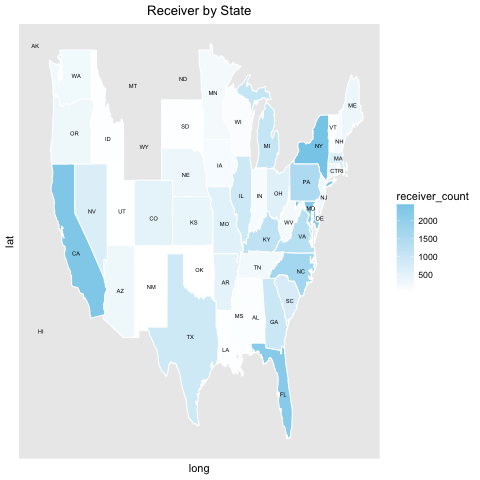

In [150]:
%%R -i map_data
library('ggplot2')
library('maps')
states <- data.frame(state.center, state.abb)


ggplot(aes(x=long, y=lat, group = group), data = map_data) + 
scale_fill_continuous(high = "skyblue", low = "white", guide="colorbar" ) + 
geom_polygon(aes(fill = receiver_count),colour="white") + 
scale_y_continuous(breaks=c()) + 
scale_x_continuous(breaks=c()) + 
geom_text(data = states, aes(x = x, y = y, label = state.abb, group = NULL), size = 2) + 
labs(title="Receiver by State") + 
theme(plot.title = element_text(hjust = 0.5))

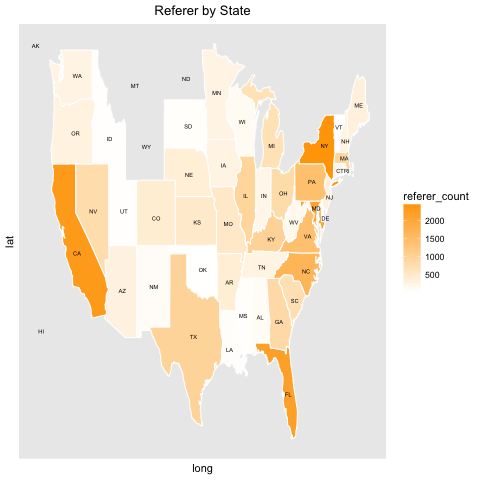

In [152]:
%%R -i map_data
library('ggplot2')
library('maps')
states <- data.frame(state.center, state.abb)


ggplot(aes(x=long, y=lat, group = group), data = map_data) + 
scale_fill_continuous(low = "white", high = "orange", guide="colorbar" ) + 
geom_polygon(aes(fill = referer_count),colour="white") + 
scale_y_continuous(breaks=c()) + 
scale_x_continuous(breaks=c()) + 
geom_text(data = states, aes(x = x, y = y, label = state.abb, group = NULL), size = 2) + 
labs(title="Referer by State") + 
theme(plot.title = element_text(hjust = 0.5))

## State to State

In [153]:
state_edge = full_data[['State_referer','State_receiver']]


In [154]:
#select state name
state_name = list(group_state['region'])[:50]

In [155]:
state_to_state = pd.DataFrame(state_edge.groupby(['State_referer','State_receiver']).size().rename('counts'))
st_to_st_df = state_to_state.reset_index()
st_to_st_df.head(3)

,State_referer,State_receiver,counts
0,AE,CA,1
1,AK,AK,14
2,AK,MD,1


In [156]:
st_st_us = st_to_st_df[st_to_st_df['State_referer'].isin(state_name) & st_to_st_df['State_receiver'].isin(state_name)]


In [157]:
st_st_group = st_st_us.groupby(['State_referer','State_receiver']).sum()

In [158]:
g = st_st_group.groupby(level=0, group_keys=False)
st_st_group = g.apply(lambda x: x.sort_values('counts',ascending=False))


In [159]:
st_st_group.head()

counts
State_referer State_receiver        
AK            AK                  14
              NH                   4
              MD                   1
              MI                   1
AL            AL                  63

#### Network

In [160]:
full_data.shape

(27751, 13)

In [161]:
%load_ext rpy2.ipython
%R -i full_data


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [162]:
full_data.head()

,referer,receiver,shared_Count,Unique_Beneficiaries,Number_Same_Day_Visits,Type_referer,State_referer,Type_receiver,State_receiver,Taxonomy_Code,Grouping,Classification,Specialization
0,1003004771,1649494980,119,30,2,1.0,CO,1.0,CO,2081H0002X,Allopathic & Osteopathic Physicians,Physical Medicine & Rehabilitation,Hospice and Palliative Medicine
1,1003878448,1649494980,59,21,1,1.0,CO,1.0,CO,2081H0002X,Allopathic & Osteopathic Physicians,Physical Medicine & Rehabilitation,Hospice and Palliative Medicine
2,1013063601,1649494980,99,20,8,1.0,CO,1.0,CO,2081H0002X,Allopathic & Osteopathic Physicians,Physical Medicine & Rehabilitation,Hospice and Palliative Medicine
3,1013989342,1649494980,166,16,2,1.0,CO,1.0,CO,2081H0002X,Allopathic & Osteopathic Physicians,Physical Medicine & Rehabilitation,Hospice and Palliative Medicine
4,1033195052,1649494980,28,13,0,1.0,CO,1.0,CO,2081H0002X,Allopathic & Osteopathic Physicians,Physical Medicine & Rehabilitation,Hospice and Palliative Medicine


In [68]:
tmp = full_data.groupby('receiver').count().sort_values('provider',ascending = False).reset_index()
count_by_hospice = tmp[['receiver','provider']]

In [76]:
count_by_hospice.columns = ['Hospice','Count']

In [78]:
count_by_hospice

,Hospice,Count
0,1780773408,1151
1,1639147051,678
2,1912962697,549
3,1861538209,518
4,1538339726,401
5,1437374683,333
6,1538168950,305
7,1225252273,271
8,1033328232,254
9,1295170686,245
